In [141]:
from numpy.core.fromnumeric import size
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from google.colab import files


class Hopfield(object):
    def __init__(self, random_state=1):
        self.random_state = random_state

    def fit(self, X):
        for k in range(len(X)):
            X_size = X[k].size
            # wyzerowanie macierzy wag
            if (k == 0):
                self.W_ = np.zeros([X_size, X_size], dtype=int)
            # utworzenie jednowymiarowej tablicy z danych uczacych
            X_vector = X[k].flatten()
            # uczenie litery
            for i in range(len(X_vector)):
                for j in range(len(X_vector)):
                    self.W_[i][j] += X_vector[i] * np.transpose(X_vector[j])
                    # wyzerowanie przekatnych
                    if (i == j):
                        self.W_[i][j] = 0

    def predict_syn(self, Xi, n_iter=10):
        wPom = np.copy(self.W_)
        stany=[]
        for i in range(len(Xi) * n_iter):
            Xi_vector = Xi.flatten()
            stany.append(Xi.flatten())
            sumaWazona = np.zeros([Xi.size], dtype=int)
            fAktywacji = np.zeros([Xi.size], dtype=int)
            for j in range(len(Xi_vector)):
                for k in range(len(Xi_vector)):
                    self.W_[j][k] = self.W_[j][k] * Xi_vector[k]
                    sumaWazona[j] += self.W_[j][k]
                if (sumaWazona[j] >= 0):
                    fAktywacji[j] = 1
                else:
                    fAktywacji[j] = -1
            self.W_ = np.copy(wPom)
            Xi = fAktywacji
            sumaWazona = {0}

        for h in range(len(stany)):
            if (h > 3 and (stany[h] == stany[h - 1]).any()):
                self.result = stany[0:h]
                break
        return self.result

    def predict_async1(self, Xi, order, n_iter=10):
        wPom = np.copy(self.W_)
        stany=[]
        for i in range(len(Xi) * n_iter):
            Xi_vector = Xi.flatten()
            stany.append(Xi.flatten())
            sumaWazona = np.zeros([Xi.size], dtype=int)
            fAktywacji = np.copy(Xi_vector)
            for j in range(len(Xi_vector)):
                for k in range(len(Xi_vector)):
                    self.W_[j][k] = self.W_[j][k] * Xi_vector[k]
                    sumaWazona[j] += self.W_[j][k]
                if (sumaWazona[j] >= 0):
                    fAktywacji[j] = 1
                else:
                    fAktywacji[j] = -1
            if (i % Xi.size == 0):
                temp = 0

            if (Xi_vector[order[temp] ] != fAktywacji[order[temp] ]):
                Xi_vector[order[temp] ] = fAktywacji[order[temp] ]

            self.W_ = np.copy(wPom)
            Xi = np.copy(Xi_vector)
            
            sumaWazona = {0}
            temp = temp + 1
        for h in range(len(stany)):
            if (h > 2 * Xi.size and (stany[h] == stany[h - X[0].size]).any()):
                self.result = stany[0:h]
                break
            else:
              self.result = stany[0:]

        return self.result

    def predict_async2(self, Xi, n_iter=10):
        wPom = np.copy(self.W_)
        stany=[]
       
        print(Xi.size)
        for i in range(len(Xi)*n_iter):
            if i % Xi.size == 0:
                order1 = []
                licznik = 0             
                while licznik < Xi.size:                    
                    self.rgen = random.randint(1,Xi.size)
                    if order1.count(self.rgen) == 0:
                        order1.append(self.rgen)
                        licznik += 1
                print(order1)
            Xi_vector = Xi.flatten()
            stany.append(Xi.flatten())
            sumaWazona = np.zeros([Xi.size], dtype=int)
            fAktywacji = np.copy(Xi_vector)
            for j in range(len(Xi_vector)):
                for k in range(len(Xi_vector)):
                    self.W_[j][k] = self.W_[j][k] * Xi_vector[k]
                    sumaWazona[j] += self.W_[j][k]
                if (sumaWazona[j] >= 0):
                    fAktywacji[j] = 1
                else:
                    fAktywacji[j] = -1
            if (i % Xi.size == 0):
                temp = 0

            if (Xi_vector[order1[temp] - 1] != fAktywacji[order1[temp] - 1]):
                Xi_vector[order1[temp] - 1] = fAktywacji[order1[temp] - 1]

            self.W_ = np.copy(wPom)
            Xi = np.copy(Xi_vector)

            sumaWazona = {0}
            temp = temp + 1
       
        for h in range(len(stany)):
            if (h > 2 * Xi.size and (stany[h] == stany[h - X[0].size]).any()):
                self.result = stany[0:h]
                break
            else:
              self.result = stany[0:]
        return self.result

    def show_result(self, width, height, nrows):
        O = np.array(self.result[1:])
        fig, ax = plt.subplots(nrows=nrows, ncols=int(len(O) / nrows), figsize=(8, 8), sharex=True, sharey=True)
        ax = ax.flatten()
        for i in range(O.shape[0]):
            img = O[i].reshape(height, width)
            ax[i].imshow(img, cmap='Greys')
    def show(self, data, width, height, nrows):
        O = np.copy(data)
        
        
        if(O.ndim>1):
          fig, ax = plt.subplots(nrows=nrows, ncols=int(len(O) / nrows), figsize=(10, 10), sharex=True, sharey=True)
          for i in range(O.shape[0]):
             ax=ax.flatten()
             img = O[i].reshape(height, width)
             ax[i].imshow(img, cmap='Greys')
        else:
          fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharex=True, sharey=True)
          img = O.reshape(height, width)
          ax.imshow(img, cmap="Greys")

X = np.array([[[-1, 1, -1], [1, -1, 1], [1, -1, 1], [-1, 1, -1]],[[1, 1, 1], [-1, 1, -1], [-1, 1, -1], [-1, 1, -1]]])


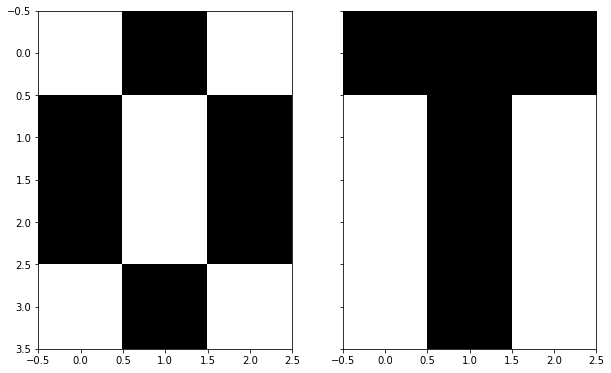

In [142]:
hopfield = Hopfield()
hopfield.show(X,3,4,1)


In [143]:
hopfield.fit(X)

In [144]:
Xi = np.array([0,1,1,1,0,1,-1,-1,-1,0,1,0])
states= hopfield.predict_syn(Xi)

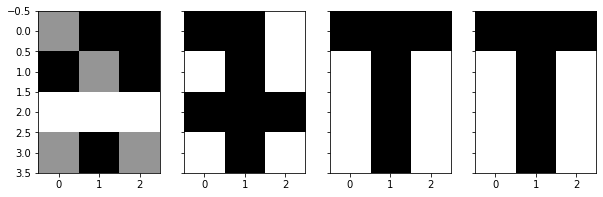

In [145]:
hopfield.show(np.array(states),3,4,1)

In [146]:
order=range(12)
states=hopfield.predict_async1(Xi, order,13)



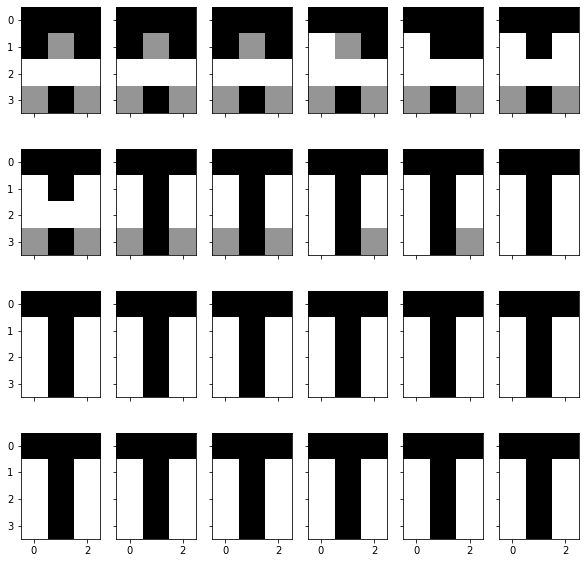

In [147]:
hopfield.show(np.array(states)[1:],3,4,4)

In [148]:
order1 = [6,1,11,12,2,9,3,5,7,10,4,8,8,11,2,9,7,5,1,4,6,12,3,10]
order1=np.array(order1)
order1-=1



In [149]:
states=hopfield.predict_async1(Xi,order1,13)

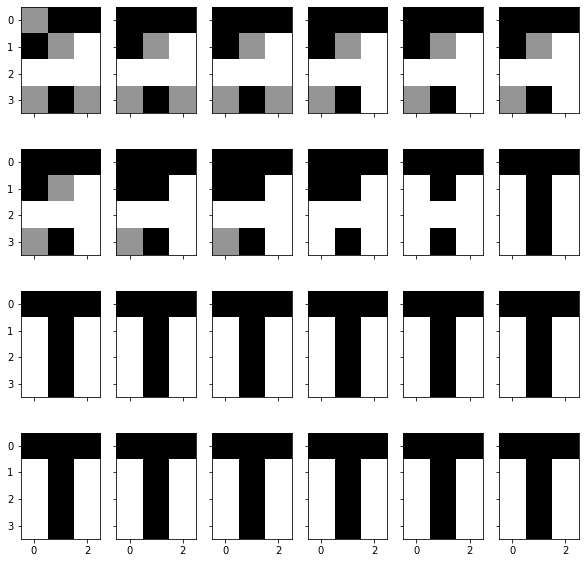

In [150]:
hopfield.show(np.array(states)[1:],3,4,4)

In [151]:
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['letters.data']),header=None)
X1 = df.iloc[[1,8],:35].values

Saving letters.data to letters (5).data


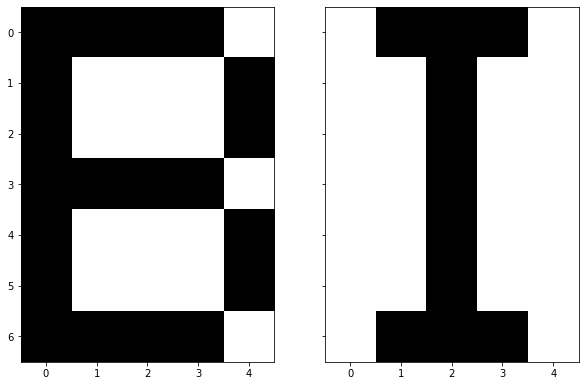

In [152]:
hopfield1 = Hopfield()
hopfield1.show(X1,5,7,1)

In [153]:
def damage(X,percent,seed=33):
  rgen= np.random.RandomState(seed)
  result = np.array(X)
  count= int(X.shape[1]*percent/100)

  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1],count,replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel]*=-1
  return result

In [154]:
damage20=damage(X1,20)

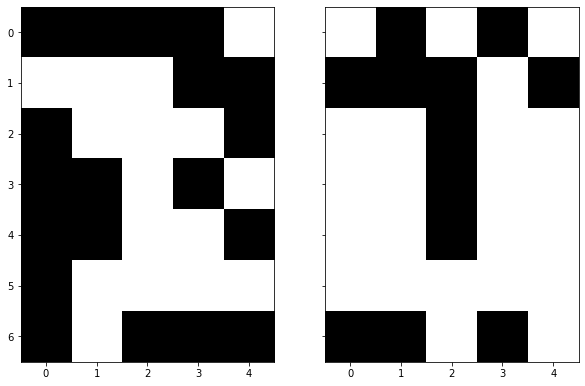

In [155]:
hopfield1.show(damage20,5,7,1)

In [156]:
hopfield1.fit(damage20)

In [157]:
Xi1 = np.array([-1,1,0,0,-1,1,-1,-1,-1,0,1,0,1,-1,-1,0,0,1,-1,0,1,1,1,0,1,-1,-1,1,0,0,1,1,-1,0,-1])


In [158]:
states1 = hopfield1.predict_syn(Xi1)

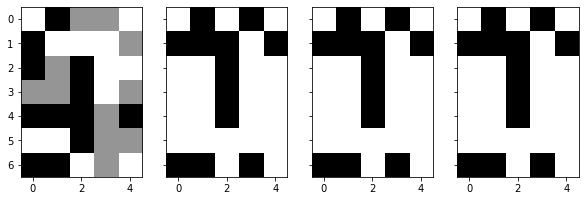

In [159]:
hopfield1.show(np.array(states1),5,7,1)

In [160]:
order = range(35)

In [161]:
states1= hopfield1.predict_async1(Xi1,order,36)

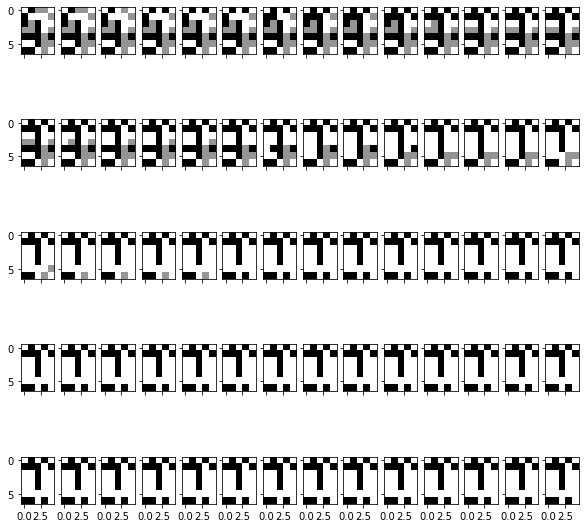

In [162]:
hopfield1.show(np.array(states1)[1:],5,7,5)

In [163]:
random.seed(33)

In [164]:
states1= hopfield1.predict_async2(Xi1, 36)

35
[11, 15, 18, 31, 35, 34, 12, 33, 21, 29, 19, 5, 20, 27, 32, 4, 28, 16, 8, 14, 24, 1, 23, 26, 25, 3, 10, 6, 13, 30, 17, 2, 7, 22, 9]
[30, 3, 2, 14, 15, 8, 22, 24, 6, 32, 20, 1, 19, 21, 34, 9, 7, 25, 29, 18, 13, 17, 12, 27, 31, 35, 16, 10, 11, 26, 23, 5, 28, 33, 4]
[27, 34, 21, 7, 28, 33, 23, 17, 16, 4, 1, 35, 31, 6, 29, 20, 22, 12, 25, 10, 9, 30, 24, 19, 11, 5, 32, 13, 8, 18, 2, 26, 14, 3, 15]
[35, 26, 30, 32, 5, 24, 17, 25, 22, 34, 33, 1, 13, 23, 10, 18, 16, 7, 8, 27, 9, 4, 2, 28, 15, 11, 20, 12, 31, 29, 6, 21, 14, 19, 3]
[30, 10, 4, 1, 12, 9, 34, 26, 11, 5, 19, 33, 29, 27, 24, 32, 13, 28, 25, 35, 22, 2, 6, 7, 17, 18, 23, 8, 21, 20, 3, 16, 15, 31, 14]
[16, 6, 3, 32, 2, 11, 26, 15, 13, 1, 30, 10, 28, 19, 9, 14, 12, 20, 21, 18, 22, 29, 8, 25, 27, 7, 23, 35, 4, 34, 17, 31, 24, 33, 5]
[8, 26, 32, 11, 2, 22, 16, 1, 35, 24, 23, 9, 19, 17, 10, 28, 29, 33, 12, 14, 34, 27, 15, 18, 13, 30, 5, 6, 31, 20, 4, 21, 3, 7, 25]
[13, 4, 19, 20, 18, 5, 10, 14, 30, 34, 8, 1, 15, 24, 25, 28, 33, 3, 32, 1

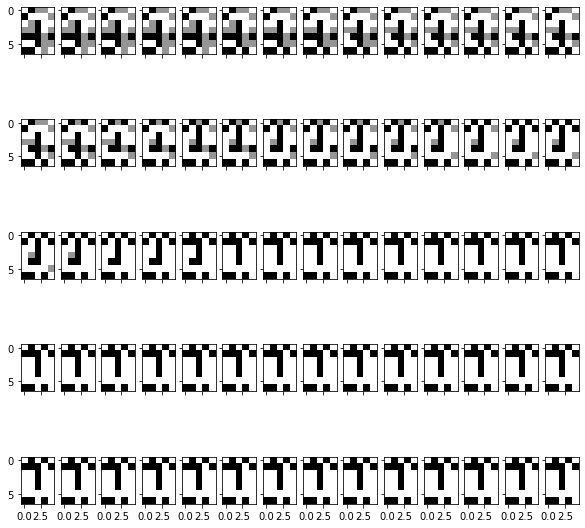

In [165]:
hopfield1.show(np.array(states1)[1:],5,7,5)